In [1]:
import sys
sys.path.append('..')
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import datetime
import theano_lstm
import numpy as np
import data_managers
import os

# Plotting
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline


Using gpu device 0: GeForce GTX TITAN X


In [2]:
data_butler = data_managers.character_data_manager('/home/arimorcos/Github/CS281-Final-Project/data manager/',
                                                   batch_size=128)

In [3]:
# Create network 
config.mode="FAST_RUN"
hidden_size = 128
network = theano_lstm.lstm_rnn(300,
                  [(hidden_size, hidden_size),
                   (hidden_size, hidden_size)],
                  150, dropout=0.2)
network.initialize_training_adadelta()

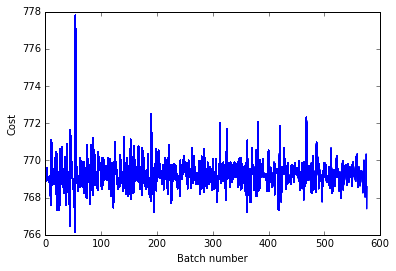

KeyboardInterrupt: 

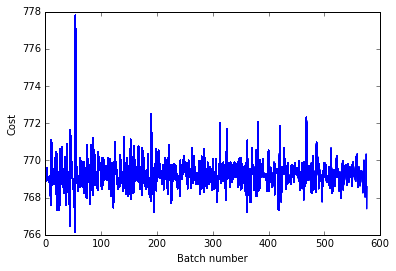

In [4]:
batch_size = 128
num_epochs = 5
num_batches = num_epochs*len(data_butler.query_list)/batch_size

# Re-initialize network 
network.initialize_network_weights()
root_dir = '/media/1_TB_Internal/lstm_rnn_data'
new_log_dir = os.path.join(root_dir, datetime.datetime.now().strftime('%y%m%d_%H%M%S'))
network.set_log_dir(new_log_dir)

#Create plot 
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Batch number')
ax.set_ylabel('Cost')

# Initialize cost 
cost = []

for batch in range(num_batches):
    
    # Get data
    vectors, lengths, answer = data_butler.offer_data()
    
    # Step 
    temp_cost = network.adadelta_step(vectors, lengths, answer)
    cost.append(temp_cost.tolist())
    
    # advance schedule 
    data_butler.advance_schedule()
    
    # Update plot 
    ax.plot(range(1, batch+2), cost, 'b')
    display.clear_output(wait=True)
    display.display(fig)

In [ ]:
import time
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Batch number')
ax.set_ylabel('Cost')

for i in range(20):
    plot_var = np.arange(i)
    ax.plot(plot_var, plot_var**2, 'b')
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(.1)
    